In [2]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import math
import numpy as np
import matplotlib.ticker as ticker
import matplotlib.animation as animation
%matplotlib inline
sns.set(font_scale=1.4)

In [50]:
covid19_df = pd.read_csv("covid_19_india.csv")
individuals_df = pd.read_csv("IndividualDetails.csv")



In [51]:
data= pd.read_csv('IndividualDetails.csv')
data.head(10)

,id,government_id,diagnosed_date,age,gender,detected_city,detected_district,detected_state,nationality,current_status,status_change_date,notes
0,0,KL-TS-P1,30/01/2020,20,F,Thrissur,Thrissur,Kerala,India,Recovered,14/02/2020,Travelled from Wuhan
1,1,KL-AL-P1,02/02/2020,NaN,NaN,Alappuzha,Alappuzha,Kerala,India,Recovered,14/02/2020,Travelled from Wuhan
2,2,KL-KS-P1,03/02/2020,NaN,NaN,Kasaragod,Kasaragod,Kerala,India,Recovered,14/02/2020,Travelled from Wuhan
3,3,DL-P1,02/03/2020,45,M,East Delhi (Mayur Vihar),East Delhi,Delhi,India,Recovered,15/03/2020,"Travelled from Austria, Italy"
4,4,TS-P1,02/03/2020,24,M,Hyderabad,Hyderabad,Telangana,India,Recovered,02/03/2020,"Travelled from Dubai to Bangalore on 20th Feb,..."
5,5,NaN,03/03/2020,69,M,Jaipur,Italians,Rajasthan,Italy,Recovered,03/03/2020,Travelled from Italy
6,6,NaN,04/03/2020,55,NaN,Gurugram,Italians,Haryana,Italy,Recovered,29/03/2020,Travelled from Italy
7,7,NaN,04/03/2020,55,NaN,Gurugram,Italians,Haryana,Italy,Recovered,29/03/2020,Travelled from Italy
8,8,NaN,04/03/2020,55,NaN,Gurugram,Italians,Haryana,Italy,Recovered,29/03/2020,Travelled from Italy
9,9,NaN,04/03/2020,55,NaN,Gurugram,Italians,Haryana,Italy,Recovered,29/03/2020,Travelled from Italy


In [52]:
data.tail()

,id,government_id,diagnosed_date,age,gender,detected_city,detected_district,detected_state,nationality,current_status,status_change_date,notes
28177,28178,NaN,22/04/2020,NaN,NaN,NaN,NaN,Maharashtra,NaN,Hospitalized,NaN,Correction for district count
28178,28179,NaN,24/04/2020,NaN,NaN,NaN,Nagpur,Maharashtra,NaN,Hospitalized,NaN,Correction for district count
28179,28180,NaN,24/04/2020,NaN,NaN,NaN,NaN,Maharashtra,NaN,Hospitalized,NaN,Correction for district count
28180,28181,NaN,25/04/2020,NaN,NaN,NaN,Nagpur,Maharashtra,NaN,Hospitalized,NaN,Correction for district count
28181,28182,NaN,25/04/2020,NaN,NaN,NaN,NaN,Maharashtra,NaN,Hospitalized,NaN,Correction for district count


In [53]:
data.shape

(28182, 12)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<Figure size 1152x432 with 0 Axes>

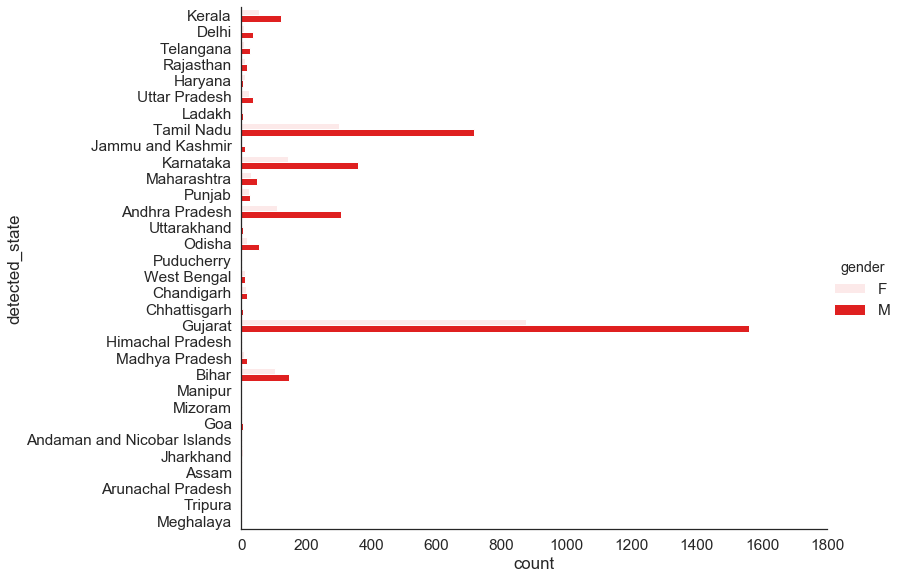

<Figure size 1152x432 with 0 Axes>

In [54]:
with sns.axes_style('white'):
    g = sns.factorplot(y ="detected_state", data=data, aspect=1.5,
                       kind="count", color='red', height=8, hue='gender')
    g.set_xticklabels(step=1)
plt.figure(figsize=(16,6))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000188AA45E748>],
      dtype=object)

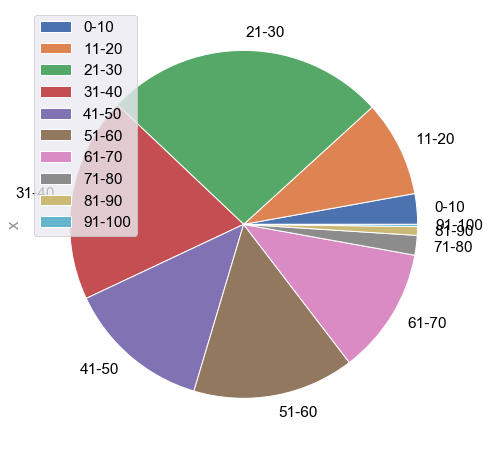

In [55]:
df = pd.DataFrame([14,44,129,94,66,74,58,9,4,1], index=['0-10', '11-20', '21-30', '31-40', '41-50'
, '51-60', '61-70', '71-80', '81-90', '91-100'], columns=['x'])
 
# make the plot
df.plot(kind='pie', subplots=True, figsize=(8, 8))

In [56]:
x = data.groupby('current_status').count()
first =data.loc[data.current_status=='Deceased',['id']]
y = first.count()
y


id    46
dtype: int64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000188AA4D7708>],
      dtype=object)

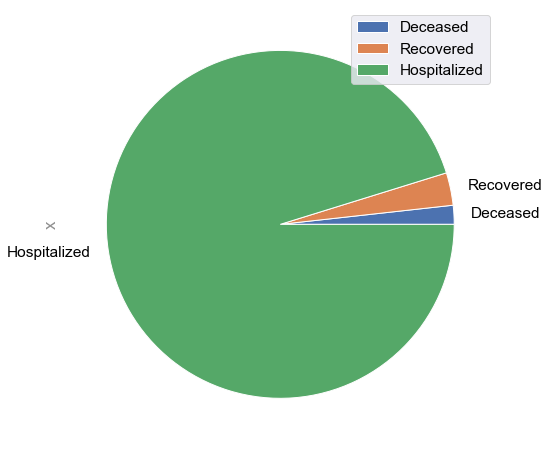

In [57]:
Male = (data['current_status'] == 'Deceased') & (data['gender'] == 'Female')
Male = len(data.loc[Male])
Male


df = pd.DataFrame([18,31,975], index=['Deceased', 'Recovered', 'Hospitalized'], columns=['x'])
 
# make the plot
df.plot(kind='pie', subplots=True, figsize=(8, 8))

In [58]:
covid19_df.shape

(5336, 9)

In [61]:
covid19_df.tail()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
5331,5332,18/08/20,8:00 AM,Telengana,-,-,72202,711,93937
5332,5333,18/08/20,8:00 AM,Tripura,-,-,5404,62,7409
5333,5334,18/08/20,8:00 AM,Uttarakhand,-,-,8485,158,12493
5334,5335,18/08/20,8:00 AM,Uttar Pradesh,-,-,104808,2515,158216
5335,5336,18/08/20,8:00 AM,West Bengal,-,-,89703,2473,119578


In [59]:
covid19_df.isna().sum()

Sno                         0
Date                        0
Time                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Confirmed                   0
dtype: int64

In [62]:
covid19_df_latest = covid19_df[covid19_df['Date']=="18/08/20"]
covid19_df_latest.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
5301,5302,18/08/20,8:00 AM,Andaman and Nicobar Islands,-,-,1325,29,2445
5302,5303,18/08/20,8:00 AM,Andhra Pradesh,-,-,209100,2732,296609
5303,5304,18/08/20,8:00 AM,Arunachal Pradesh,-,-,1893,5,2741
5304,5305,18/08/20,8:00 AM,Assam,-,-,56734,197,79667
5305,5306,18/08/20,8:00 AM,Bihar,-,-,76452,468,106307


In [63]:
covid19_df_latest['Confirmed'].sum()

2702742

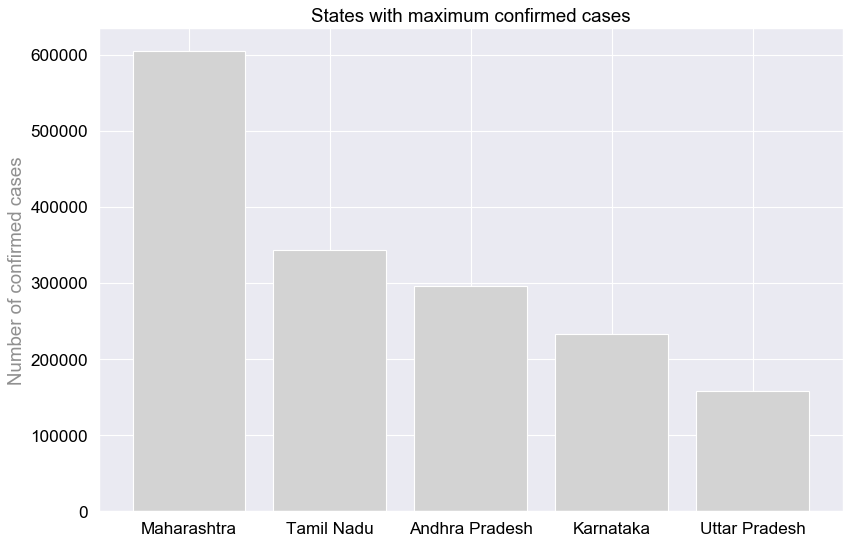

In [64]:
covid19_df_latest = covid19_df_latest.sort_values(by=['Confirmed'],ascending = False)
plt.figure(figsize=(12,8),dpi = 80)
plt.bar(covid19_df_latest['State/UnionTerritory'][:5],covid19_df_latest['Confirmed'][:5],align='center',color='lightgrey')
plt.ylabel('Number of confirmed cases')
plt.title('States with maximum confirmed cases')
plt.show()

In [65]:
covid19_df_latest['Deaths'].sum()

51797

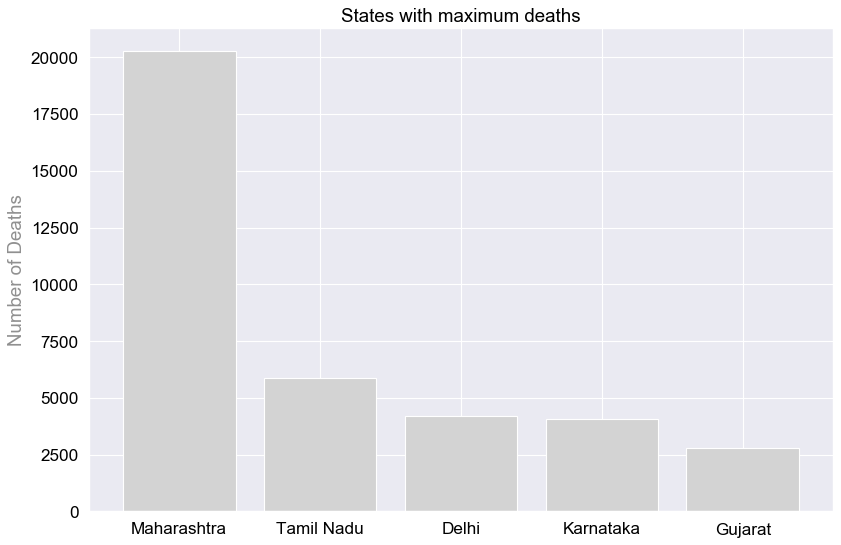

In [66]:
covid19_df_latest = covid19_df_latest.sort_values(by=['Deaths'],ascending = False)
plt.figure(figsize=(12,8), dpi=80)
plt.bar(covid19_df_latest['State/UnionTerritory'][:5], covid19_df_latest['Deaths'][:5], align='center',color='lightgrey')
plt.ylabel('Number of Deaths')
plt.title('States with maximum deaths')
plt.show()

In [67]:
covid19_df_latest['Deaths/Confirmed Cases'] = (covid19_df_latest['Confirmed']/covid19_df_latest['Deaths']).round(2)
covid19_df_latest['Deaths/Confirmed Cases'] = [np.nan if x==float("inf") else x for x in covid19_df_latest['Deaths/Confirmed Cases']]
covid19_df_latest = covid19_df_latest.sort_values(by=['Deaths/Confirmed Cases'], ascending=True,na_position='last')
covid19_df_latest.iloc[:10]

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,Deaths/Confirmed Cases
5311,5312,18/08/20,8:00 AM,Gujarat,-,-,62595,2800,79710,28.47
5320,5321,18/08/20,8:00 AM,Maharashtra,-,-,428514,20265,604358,29.82
5309,5310,18/08/20,8:00 AM,Delhi,-,-,138301,4214,153367,36.39
5327,5328,18/08/20,8:00 AM,Punjab,-,-,20180,863,32696,37.89
5319,5320,18/08/20,8:00 AM,Madhya Pradesh,-,-,35025,1128,46385,41.12
5335,5336,18/08/20,8:00 AM,West Bengal,-,-,89703,2473,119578,48.35
5314,5315,18/08/20,8:00 AM,Jammu and Kashmir,-,-,21296,548,28892,52.72
5316,5317,18/08/20,8:00 AM,Karnataka,-,-,148562,4062,233283,57.43
5330,5331,18/08/20,8:00 AM,Tamil Nadu,-,-,283937,5886,343945,58.43
5334,5335,18/08/20,8:00 AM,Uttar Pradesh,-,-,104808,2515,158216,62.91


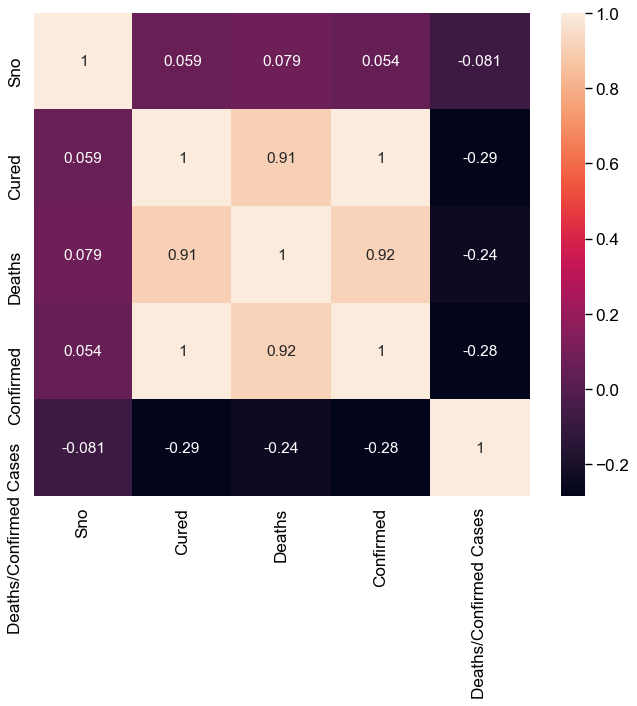

In [68]:
plt.figure(figsize=(10,8),dpi=80)
sns.heatmap(covid19_df_latest.corr(),annot=True)

In [69]:
individuals_df.isna().sum()

id                        0
government_id         25185
diagnosed_date            0
age                   25836
gender                22869
detected_city         25832
detected_district      6984
detected_state            0
nationality           25473
current_status            0
status_change_date      402
notes                  1335
dtype: int64

In [70]:
individuals_df.iloc[0]

id                                       0
government_id                     KL-TS-P1
diagnosed_date                  30/01/2020
age                                     20
gender                                   F
detected_city                     Thrissur
detected_district                 Thrissur
detected_state                      Kerala
nationality                          India
current_status                   Recovered
status_change_date              14/02/2020
notes                 Travelled from Wuhan
Name: 0, dtype: object

In [71]:
individuals_grouped_district = individuals_df.groupby('detected_district')
individuals_grouped_district = individuals_grouped_district['id']
individuals_grouped_district.columns=['count']
individuals_grouped_district.count().sort_values(ascending=False).head()

detected_district
Mumbai       3149
Ahmedabad    2181
Indore       1176
Jaipur        808
Pune          706
Name: id, dtype: int64

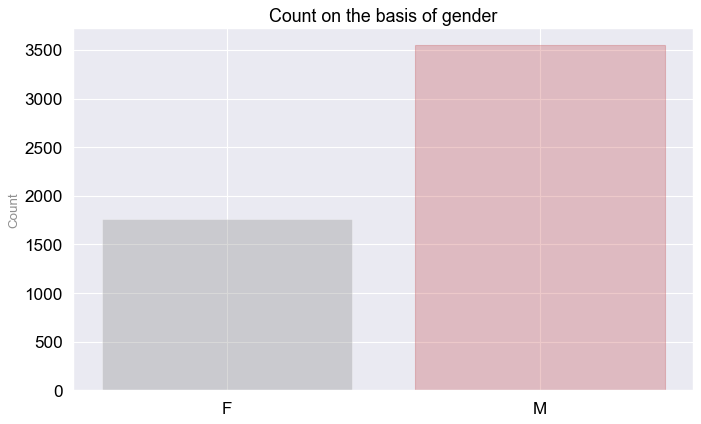

In [72]:
individuals_grouped_gender = individuals_df.groupby('gender')
individuals_grouped_gender = pd.DataFrame(individuals_grouped_gender.size().reset_index(name='count'))
individuals_grouped_gender.head()

plt.figure(figsize=(10,6),dpi=80)
barlist= plt.bar(individuals_grouped_gender['gender'],individuals_grouped_gender['count'],align='center',color='grey',alpha=0.3)
barlist[1].set_color('r')
plt.ylabel('Count',size=12)
plt.title('Count on the basis of gender',size=16)
plt.show()


In [73]:
individuals_grouped_date = individuals_df.groupby('diagnosed_date')
individuals_grouped_date = pd.DataFrame(individuals_grouped_date.size().reset_index(name="count"))
individuals_grouped_date[['Day','Month','Year']] = individuals_grouped_date.diagnosed_date.apply(
    lambda x : pd.Series(str(x).split("/")))
individuals_grouped_date.sort_values(by=['Year','Month','Day'],inplace=True,ascending=True)
individuals_grouped_date.reset_index(inplace=True)
individuals_grouped_date['Cumulative Count'] = individuals_grouped_date['count'].cumsum()
individuals_grouped_date = individuals_grouped_date.drop(['index','Day','Month','Year'],axis=1)
individuals_grouped_date.head()

,diagnosed_date,count,Cumulative Count
0,30/01/2020,1,1
1,02/02/2020,1,2
2,03/02/2020,1,3
3,02/03/2020,2,5
4,03/03/2020,1,6


In [74]:
individuals_grouped_date.tail()

,diagnosed_date,count,Cumulative Count
54,22/04/2020,1302,21503
55,23/04/2020,1701,23204
56,24/04/2020,1444,24648
57,25/04/2020,1883,26531
58,26/04/2020,1651,28182


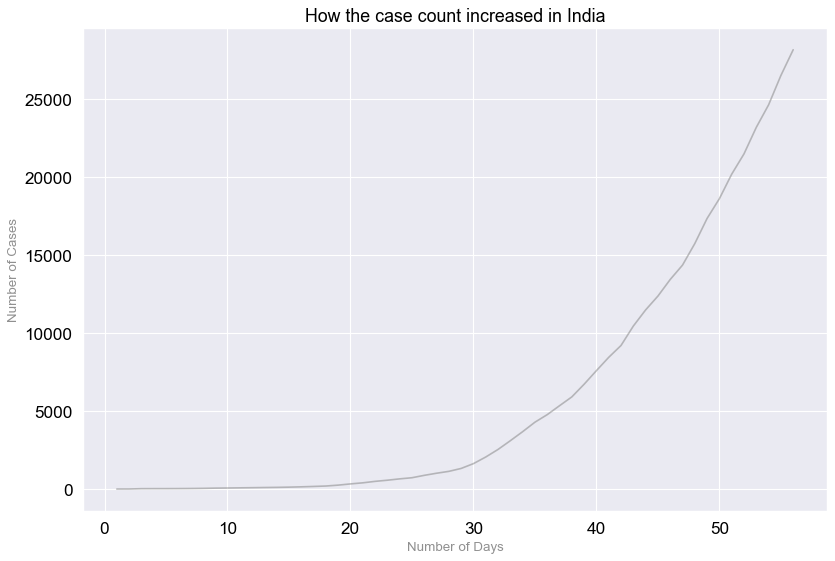

In [75]:
individuals_grouped_date = individuals_grouped_date.iloc[3:]
individuals_grouped_date.reset_index(inplace=True)
individuals_grouped_date.columns = ['Day Number','diagnosed_date','count','Cumulative Count']
individuals_grouped_date['Day Number']  = individuals_grouped_date['Day Number']-2


plt.figure(figsize=(12,8), dpi=80)
plt.plot(individuals_grouped_date['Day Number'],individuals_grouped_date['Cumulative Count'],color="grey",alpha=0.5)
plt.xlabel('Number of Days', size = 12)
plt.ylabel('Number of Cases', size = 12)
plt.title('How the case count increased in India', size=16)
plt.show()

In [76]:
covid19_maharashtra = covid19_df[covid19_df['State/UnionTerritory']=="Maharashtra"]
covid19_maharashtra.head()
covid19_maharashtra.reset_index(inplace=True)
covid19_maharashtra= covid19_maharashtra.drop(['index', 'Sno', 'Time', 'ConfirmedIndianNational', 'ConfirmedForeignNational','Cured'],  axis = 1)
covid19_maharashtra.reset_index(inplace = True)
covid19_maharashtra.columns = ['Day Count', 'Date', 'State/UnionTerritory', 'Deaths', 'Confirmed']
covid19_maharashtra['Day Count'] = covid19_maharashtra['Day Count'] +8
missing_values = pd.DataFrame({"Day Count":[x for x in range(1,8)],
                              "Date": ["0"+ str(x)+"/06/20" for x in range(2,9)],
                              "State/UnionTerritory": ["Maharashtra"]*7,
                                "Deaths": [0]*7,
                                  "Confirmed": [0]*7})
covid19_maharashtra = covid19_maharashtra.append(missing_values,ignore_index=True)
covid19_maharashtra = covid19_maharashtra.sort_values(by="Day Count", ascending = True)

covid19_maharashtra.reset_index(drop=True, inplace=True)
print(covid19_maharashtra.shape)
covid19_maharashtra.head()

(170, 5)


,Day Count,Date,State/UnionTerritory,Deaths,Confirmed
0,1,02/06/20,Maharashtra,0,0
1,2,03/06/20,Maharashtra,0,0
2,3,04/06/20,Maharashtra,0,0
3,4,05/06/20,Maharashtra,0,0
4,5,06/06/20,Maharashtra,0,0


In [77]:
covid19_kerala = covid19_df[covid19_df['State/UnionTerritory'] == "Kerala"]
covid19_kerala = covid19_kerala.iloc[32:]
covid19_kerala.reset_index(inplace = True)
covid19_kerala = covid19_kerala.drop(['index','Sno', 'Time', 'ConfirmedIndianNational', 'ConfirmedForeignNational','Cured'], axis = 1)
covid19_kerala.reset_index(inplace = True)
covid19_kerala.columns = ['Day Count', 'Date', 'State/UnionTerritory', 'Deaths', 'Confirmed']
covid19_kerala['Day Count'] = covid19_kerala['Day Count'] + 1
print(covid19_kerala.shape)
covid19_kerala.head()

(170, 5)


,Day Count,Date,State/UnionTerritory,Deaths,Confirmed
0,1,02/03/20,Kerala,0,3
1,2,03/03/20,Kerala,0,3
2,3,04/03/20,Kerala,0,3
3,4,05/03/20,Kerala,0,3
4,5,06/03/20,Kerala,0,3


In [78]:
covid19_delhi = covid19_df[covid19_df['State/UnionTerritory'] == "Delhi"]
covid19_delhi.reset_index(inplace = True)
covid19_delhi = covid19_delhi.drop(['index','Sno', 'Time', 'ConfirmedIndianNational', 'ConfirmedForeignNational','Cured'], axis = 1)
covid19_delhi.reset_index(inplace = True)
covid19_delhi.columns = ['Day Count', 'Date', 'State/UnionTerritory', 'Deaths', 'Confirmed']
covid19_delhi['Day Count'] = covid19_delhi['Day Count'] + 1
print(covid19_delhi.shape)
covid19_delhi.head()

(170, 5)


,Day Count,Date,State/UnionTerritory,Deaths,Confirmed
0,1,02/03/20,Delhi,0,1
1,2,03/03/20,Delhi,0,1
2,3,04/03/20,Delhi,0,1
3,4,05/03/20,Delhi,0,2
4,5,06/03/20,Delhi,0,3


In [79]:
covid19_gujarat = covid19_df[covid19_df['State/UnionTerritory'] == "Gujarat"]
covid19_gujarat.reset_index(inplace = True)
covid19_gujarat = covid19_gujarat.drop(['index','Sno', 'Time', 'ConfirmedIndianNational', 'ConfirmedForeignNational','Cured'], axis = 1)
covid19_gujarat.reset_index(inplace = True)
covid19_gujarat.columns = ['Day Count', 'Date', 'State/UnionTerritory', 'Deaths', 'Confirmed']
covid19_gujarat['Day Count'] = covid19_gujarat['Day Count'] + 19
missing_values = pd.DataFrame({"Day Count": [x for x in range(1,19)],
                           "Date": [("0" + str(x) if x < 10 else str(x))+"/03/20" for x in range(2,20)],
                           "State/UnionTerritory": ["Gujarat"]*18,
                           "Deaths": [0]*18,
                           "Confirmed": [0]*18})
covid19_gujarat = covid19_gujarat.append(missing_values, ignore_index = True)
covid19_gujarat = covid19_gujarat.sort_values(by="Day Count", ascending = True)
covid19_gujarat.reset_index(drop=True, inplace=True)
print(covid19_gujarat.shape)
covid19_gujarat.head()

(170, 5)


,Day Count,Date,State/UnionTerritory,Deaths,Confirmed
0,1,02/03/20,Gujarat,0,0
1,2,03/03/20,Gujarat,0,0
2,3,04/03/20,Gujarat,0,0
3,4,05/03/20,Gujarat,0,0
4,5,06/03/20,Gujarat,0,0


In [80]:
covid19_tamilnadu = covid19_df[covid19_df['State/UnionTerritory'] == "Tamil Nadu"]
covid19_tamilnadu.reset_index(inplace = True)
covid19_tamilnadu = covid19_tamilnadu.drop(['index','Sno', 'Time', 'ConfirmedIndianNational', 'ConfirmedForeignNational','Cured'], axis = 1)
covid19_tamilnadu.reset_index(inplace = True)
covid19_tamilnadu.columns = ['Day Count', 'Date', 'State/UnionTerritory', 'Deaths', 'Confirmed']
covid19_tamilnadu['Day Count'] = covid19_delhi['Day Count'] + 1
print(covid19_tamilnadu.shape)
covid19_tamilnadu.head()

(165, 5)


,Day Count,Date,State/UnionTerritory,Deaths,Confirmed
0,2,07/03/20,Tamil Nadu,0,1
1,3,08/03/20,Tamil Nadu,0,1
2,4,09/03/20,Tamil Nadu,0,1
3,5,10/03/20,Tamil Nadu,0,1
4,6,11/03/20,Tamil Nadu,0,1


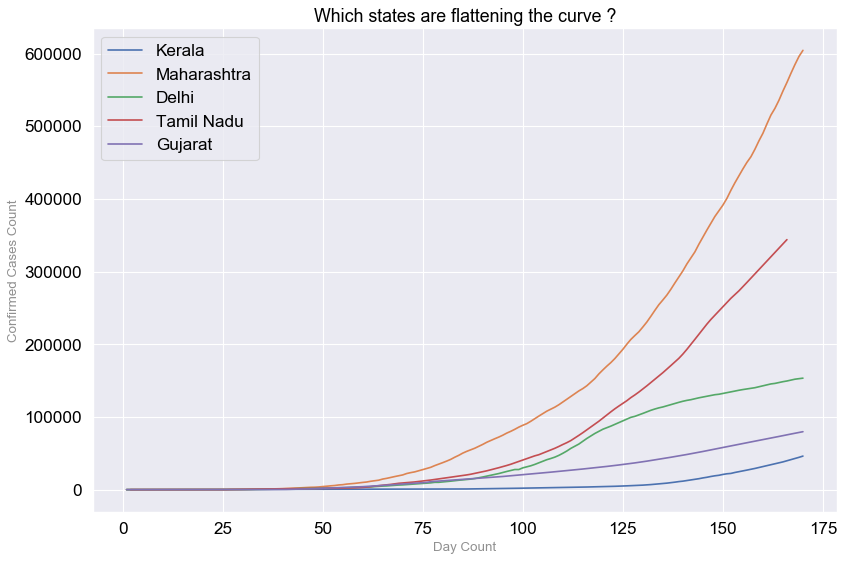

In [81]:
plt.figure(figsize=(12,8), dpi=80)
plt.plot(covid19_kerala['Day Count'], covid19_kerala['Confirmed'])
plt.plot(covid19_maharashtra['Day Count'], covid19_maharashtra['Confirmed'])
plt.plot(covid19_delhi['Day Count'], covid19_delhi['Confirmed'])
plt.plot(covid19_tamilnadu['Day Count'], covid19_tamilnadu['Confirmed'])
plt.plot(covid19_gujarat['Day Count'], covid19_gujarat['Confirmed'])
plt.legend(['Kerala', 'Maharashtra', 'Delhi', 'Tamil Nadu', 'Gujarat'], loc='upper left')
plt.xlabel('Day Count', size=12)
plt.ylabel('Confirmed Cases Count', size=12)
plt.title('Which states are flattening the curve ?', size = 16)
plt.show()